# Hudson Arney
## Lab 5 - Feed Forward Nueral Network
### CSC 5601 - Theory of Machine Learning
### Introduction: 
In this lab, I explored the practical application of Multilayer Perceptron (MLP) neural networks for classification tasks. I began by training an MLP classifier on a dataset, examining its decision boundaries and evaluating its performance through ROC analysis. Subsequently, I used the learned features from the MLP to enhance classification accuracy by training a logistic regression model.

## Reflection Questions

### Problem 1:
What do the parameters to the MLPClassifier class mean?
- The MLPClassifier parameters control the architecture and training of a Multi-Layer Perceptron model. 
    - **hidden_layer_sizes** defines the network structure
    - **activation** specifies the activation function 
    - **solver** determines the optimization algorithm
    - **alpha** adds regularization
    - **batch_size** sets the number of samples per batch
    - **learning_rate** manages step size, and max_iter limits training iterations.

- Draw a graph of the network configuration/architecture.
    - 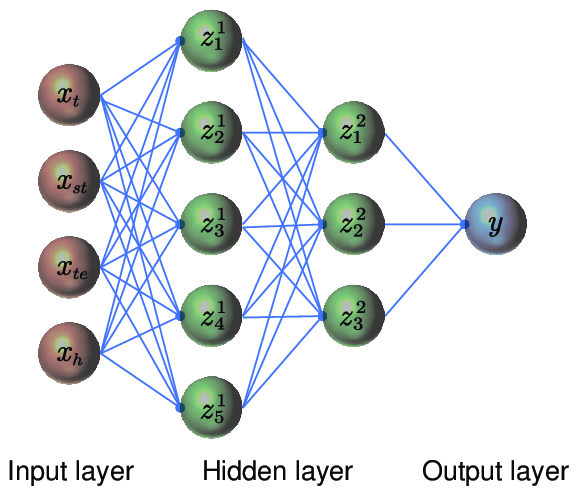

- What activation functions are used for each node?
    - Input Layer: Typically, the input layer does not apply any activation function. It simply passes the input values forward to the next layer.
    - Hidden Layers: Nodes in the hidden layers often use activation functions like the Rectified Linear Unit (ReLU) or hyperbolic tangent (tanh) function.
    - Output Layer: The activation function used in the output layer depends on the nature of the problem being solved. For binary classification problems, a sigmoid activation function is commonly used. For multi-class classification, a softmax activation function is often employed. For regression tasks, linear activation or no activation function may be used.


### Problem 2:
- What are the dimensions of mlp.coefs_[0] and mlp.intercepts_[0]? Where do those dimensions come from?
    - mlp.coefs_[0] represents the weights matrix between the input layer and the first hidden layer. 
    - Its dimensions are (num_input_features, num_hidden_neurons)

    - mlp.intercepts_[0] represents the bias terms for the neurons in the first hidden layer. 
    - Its dimensions are (n_hidden_neurons,)

    Comment on the abilities of the lines to separate Class 1 from Class 0.
    - The nature of the XOR plot makes it impossible to create a linear decision boundary with 100% accuracy as you are bound to get some incorrect points when dividing. From the subplots the best lines are only slightly better than 50% accurate with a line around y=x.


### Problem 3:
- How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used the logistic function as an activation layer instead?
    - ReLU is a piecewise linear function that outputs the input directly if it is positive, otherwise, it outputs zero. In contrast, the logistic function is an S-shaped curve that maps any real-valued number to the range [0, 1].

    - If we used the logistic function as an activation layer instead of ReLU in the hidden layer of a neural network, the heatmaps/contour plots would likely show smoother transitions between regions of high and low activation. The logistic function should produce more gradual changes in output compared to ReLU, resulting in a more gradual separation of classes in the feature space.


- A neural network consists of different layers and a final classification layer. Which activation function (ReLU or logistic) is more suitable to use for a classification layer? Which activation function is more suitable to use for an inner layer? – You may need to look up this information.
    - The logistic activation function is preferred as it confines outputs to [0, 1], suitable for binary classification tasks.
    - ReLU  is commonly used due to faster convergence, addressing the vanishing gradient problem, and inducing sparsity for efficiency.


### Problem 4:
- How do the ROCs two models compare? Did the transformed features produce a more accurate model?
    - The initial LR model only had about 50% accuracy, which is as good as guessing the same class each time (not very helpful). 
    - The model with transformed features from the neural network did exceptionally well with over 93% accuracy.  

- Are MLPs examples of linear or non-linear models? 
    - MLP is a non-linear model because they can learn complex patterns and relationships between inputs and outputs through the activation functions and multiple layers of neurons

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from neurons import Neuron, Input, HStack

### Experiment 1: Data Loading, Data Visualization, and Baseline Models.

1. 

In [2]:
xor_df = pd.read_csv('xor.csv')
xor_df.head()

,ind,X1,X2,label
0,0,0.295740,0.084965,0.0
1,1,0.071516,0.281896,0.0
2,2,0.167992,0.242829,0.0
3,3,0.007919,0.481756,0.0
4,4,0.100156,0.447592,0.0


2.

In [3]:
X = xor_df[['X1', 'X2']].values
labels = xor_df['label'].values

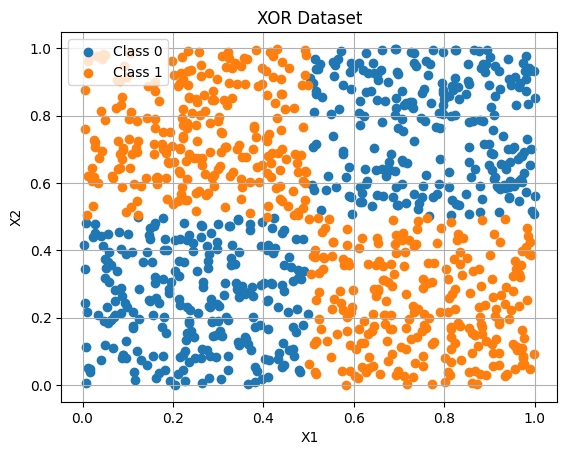

In [4]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='Class 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='Class 1')

plt.title('XOR Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

3.

In [5]:
y = xor_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.52


4.

In [6]:
y_prob = sgd_clf.predict_proba(X_test)[:, 1]

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

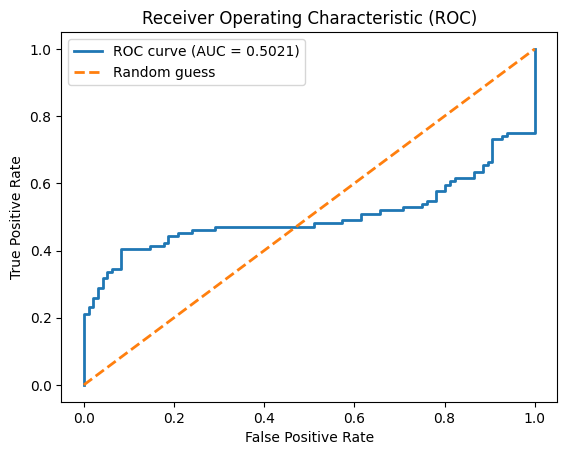

In [8]:
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

In [9]:
print("AUC:", roc_auc)

AUC: 0.5021033653846154


### Experiment 2: Training and Visualizing Layers of a MultiLayer Perceptron (MLP)

1.

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')
mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, solver='lbfgs')

**Visualize Decision Boundaries Learned by Individual Neurons**

1.

In [11]:
mlp_models = np.vstack([mlp.intercepts_[0], mlp.coefs_[0]]).T

In [12]:
print(mlp_models)

[[-2.25938539 -2.57885456 -0.23890603]
 [-0.58136767  0.5200788  -0.06133951]
 [-3.38760573  3.47535922  3.26777356]
 [ 4.87226755 -4.9524884  -4.77229877]]


2.

To rearrange the given equation to solve for $x_2$, we isolate $x_2$ on one side of the equation:

$0$ = $B_0$ + $B_1$ $x_1$ + $B_2$ $x_2$

$B_2 x_2 = -B_0 - B_1 x_1$

$x_2 = \frac{{-B_0 - B_1 x_1}}{{B_2}}$


3.

In [13]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

In [14]:
xx = np.linspace(x_min, x_max, 100)

In [15]:
print("Shape of coefs_[0]:", mlp.coefs_[0].shape)
print("Shape of intercepts_[0]:", mlp.intercepts_[0].shape)

Shape of coefs_[0]: (2, 4)
Shape of intercepts_[0]: (4,)


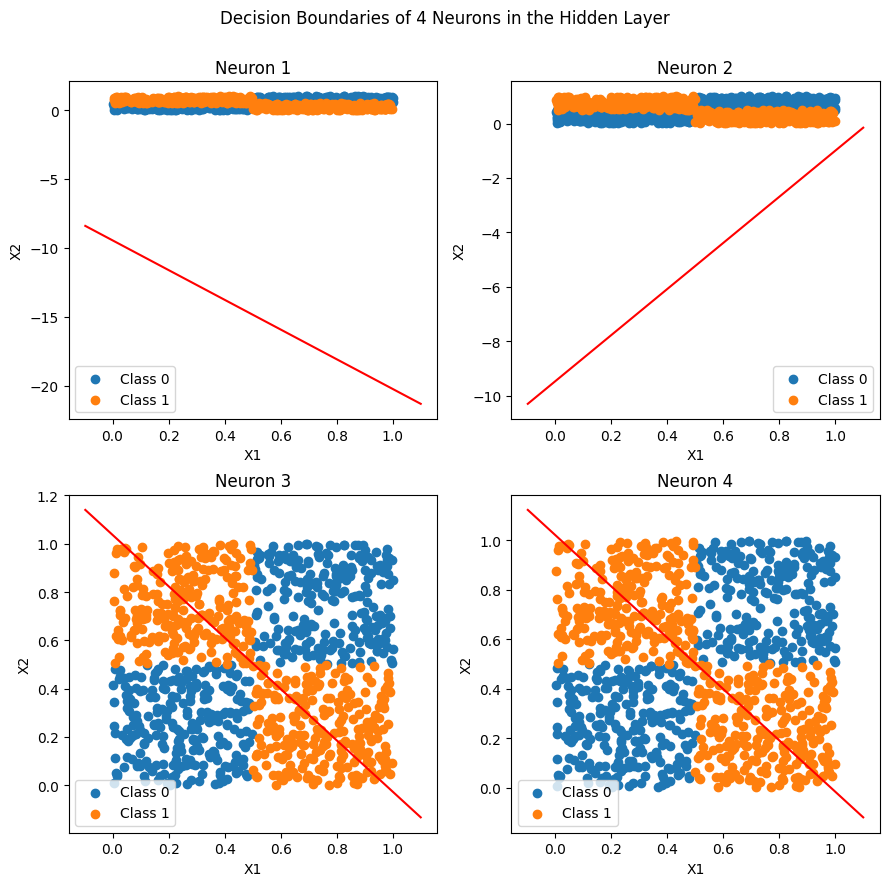

In [16]:
plt.figure(figsize=(9, 9))
for i in range(4):
    plt.subplot(2, 2, i + 1)

    weights = mlp.coefs_[0][:, i]
    bias = mlp.intercepts_[0][i]
    
    yy = (-weights[0] * xx - bias) / weights[1]
    
    # decision boundary
    plt.plot(xx, yy, c='red')

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')

    plt.title(f'Neuron {i+1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.suptitle("Decision Boundaries of 4 Neurons in the Hidden Layer")
plt.subplots_adjust(top=0.9)
plt.show()


**Visualize Decision Boundaries Resulting from Planes and ReLU Activation Function**

1.

In [17]:
x_min, x_max = -2, 2
y_min, y_max = -2, 2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

2.

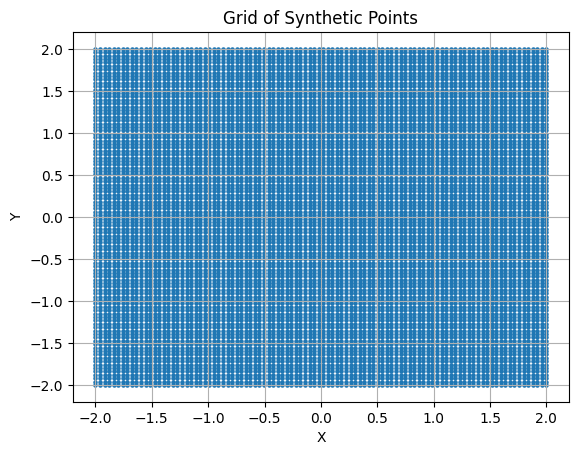

In [18]:
plt.scatter(xx, yy, s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grid of Synthetic Points')
plt.grid(True)
plt.show()

3.

In [19]:
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x_values, y_values)
input_layer = Input()

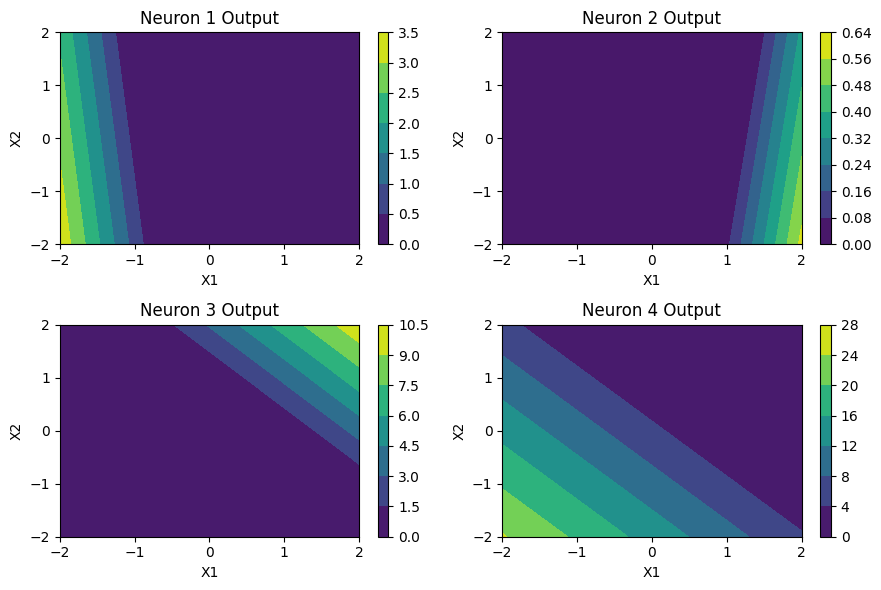

In [20]:
plt.figure(figsize=(9, 6))
for i in range(4):
    weights_neuron = mlp_models[i, :]

    neuron_hidden = Neuron([input_layer], weights_neuron)

    pred = neuron_hidden.predict(np.c_[xx.ravel(), yy.ravel()])

    pred = pred.reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, pred)
    plt.colorbar()
    plt.title(f'Neuron {i + 1} Output')
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.tight_layout()
plt.show()

### Experiment 3: Train a Logistic Regression Model on these New Features

1.

In [21]:
input = Input()
layer_1 = Neuron([input], mlp_models[0, :])
layer_2 = Neuron([input], mlp_models[1, :])
layer_3 = Neuron([input], mlp_models[2, :])
layer_4 = Neuron([input], mlp_models[3, :])
stacked = HStack([layer_1, layer_2, layer_3, layer_4])

2.

In [22]:
transformed_X = stacked.predict(X)

3.

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(transformed_X, labels)

LogisticRegression()

4.

In [24]:
y_pred_prob_logistic = logistic_model.predict_proba(transformed_X)[:, 1]

fpr_logistic, tpr_logistic, _ = roc_curve(labels, y_pred_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

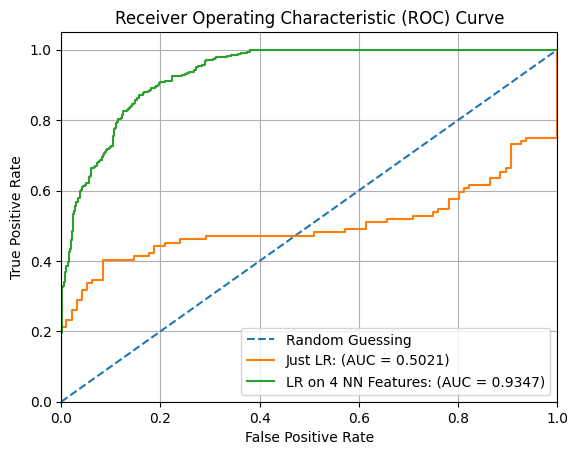

In [25]:
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr, tpr, label='Just LR: (AUC = {:.4f})'.format(roc_auc))
plt.plot(fpr_logistic, tpr_logistic, label='LR on 4 NN Features: (AUC = %0.4f)' % roc_auc_logistic)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()